In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

from matplotlib.pyplot import figure

import plotly.express as px

In [ ]:
transport_df = pd.read_csv('/content/drive/MyDrive/Transport/combined_transport_data.csv')
print("Number of records in the trasnport dataset:", len(transport_df))

Number of records in the trasnport dataset: 2594209


In [ ]:
transport_df.describe()

YEAR    QUARTER      MONTH  DAY_OF_MONTH   DAY_OF_WEEK  \
count  2.594209e+06  2594209.0  2594209.0  2.594209e+06  2.594209e+06   
mean   2.021062e+03        3.0        9.0  1.554589e+01  3.984760e+00   
std    1.465576e+00        0.0        0.0  8.645298e+00  1.984303e+00   
min    2.019000e+03        3.0        9.0  1.000000e+00  1.000000e+00   
25%    2.020000e+03        3.0        9.0  8.000000e+00  2.000000e+00   
50%    2.021000e+03        3.0        9.0  1.600000e+01  4.000000e+00   
75%    2.022000e+03        3.0        9.0  2.300000e+01  6.000000e+00   
max    2.023000e+03        3.0        9.0  3.000000e+01  7.000000e+00   

       OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
count           2.594209e+06       2.594209e+06       2.594209e+06   
mean            1.997188e+04       2.531494e+03       1.263824e+04   
std             3.758675e+02       1.737236e+03       1.532957e+03   
min             1.939300e+04       1.000000e+00       1.013500e+04   
25%             1.979000e+04       1.075000e+03       1.129200e+04   
50%             1.993000e+04       2.194000e+03       1.288900e+04   
75%             2.036600e+04       3.810000e+03       1.393100e+04   
max             2.045200e+04       8.819000e+03       1.686900e+04   

       ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  ...     DEP_DEL15  \
count           2.594209e+06           2.594209e+06  ...  2.560960e+06   
mean            1.263828e+06           3.171905e+04  ...  1.459640e-01   
std             1.532955e+05           1.317972e+03  ...  3.530702e-01   
min             1.013505e+06           3.007000e+04  ...  0.000000e+00   
25%             1.129202e+06           3.061500e+04  ...  0.000000e+00   
50%             1.288903e+06           3.145300e+04  ...  0.000000e+00   
75%             1.393102e+06           3.246700e+04  ...  0.000000e+00   
max             1.686902e+06           3.610100e+04  ...  1.000000e+00   

           TAXI_OUT    WHEELS_OFF     CANCELLED      DIVERTED      AIR_TIME  \
count  2.560056e+06  2.560056e+06  2.594209e+06  2.594209e+06  2.554800e+06   
mean   1.632561e+01  1.348082e+03  1.322870e-02  1.962448e-03  1.099564e+02   
std    8.497674e+00  4.907088e+02  1.142528e-01  4.425604e-02  6.853987e+01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00   
25%    1.100000e+01  9.330000e+02  0.000000e+00  0.000000e+00  6.000000e+01   
50%    1.400000e+01  1.332000e+03  0.000000e+00  0.000000e+00  9.200000e+01   
75%    1.900000e+01  1.745000e+03  0.000000e+00  0.000000e+00  1.380000e+02   
max    1.820000e+02  2.400000e+03  1.000000e+00  1.000000e+00  6.650000e+02   

         FLIGHTS  CARRIER_DELAY  WEATHER_DELAY      NAS_DELAY  
count  2594209.0  372700.000000  372700.000000  372700.000000  
mean         1.0      25.144889       3.315506      13.348312  
std          0.0      73.382439      27.761106      34.991789  
min          1.0       0.000000       0.000000       0.000000  
25%          1.0       0.000000       0.000000       0.000000  
50%          1.0       3.000000       0.000000       0.000000  
75%          1.0      23.000000       0.000000      17.000000  
max          1.0    3027.000000    1301.000000    1567.000000  

[8 rows x 28 columns]

In [ ]:
data = ""
with open("/content/drive/MyDrive/AirCode.txt", "r") as f:
  data = f.read()
  f.close()

data = data.split("\n")
airport_codes = {}
for d in data:
  temp = d.split(":")
  airport_codes[temp[0]] = temp[1]

airlines = pd.read_csv('/content/drive/MyDrive/airlines.csv')
airports = pd.read_csv('/content/drive/MyDrive/airports.csv')
airports = airports.rename(columns={'IATA_CODE':'ORIGIN'})
airlines = airlines.rename(columns={'IATA_CODE':'OP_UNIQUE_CARRIER'})

In [ ]:
#bird_strike_df = bird_strike_df.replace({"AIRPORT_ID": airport_codes})
transport_df = transport_df.merge(airports, on='ORIGIN')
transport_df = transport_df.merge(airlines, on='OP_UNIQUE_CARRIER')

Visualizations

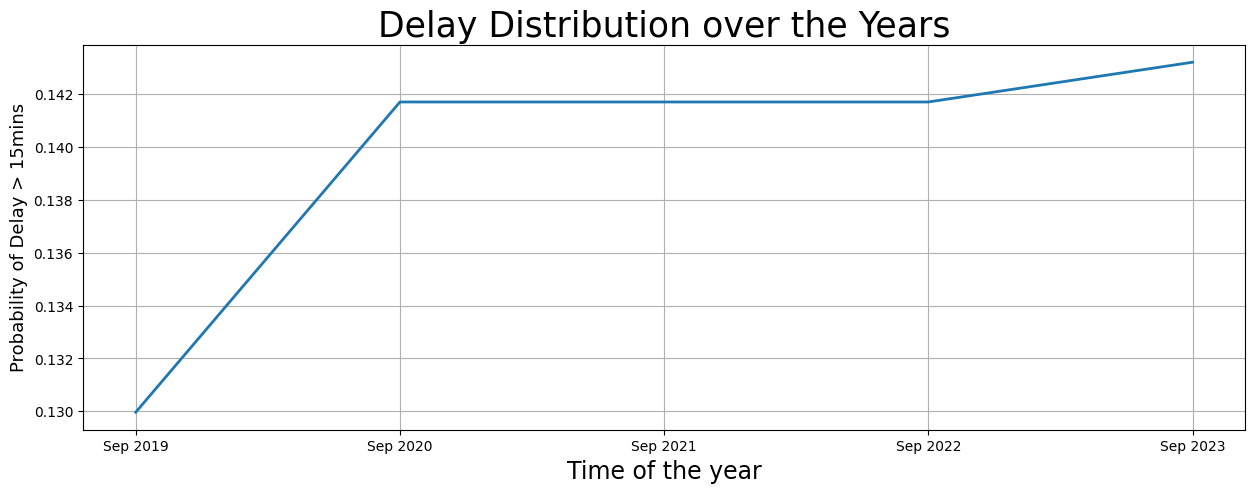

In [ ]:
delay_distribution = (
    transport_df
    .assign(flight_day = transport_df['YEAR'], is_delayed = transport_df['DEP_DELAY'] >= 15)
    .groupby('flight_day')
    .is_delayed.mean()
    .rolling(7, min_periods=1, center=True)
    .mean()
)

plt.figure(figsize=(15,5))
plt.plot(delay_distribution, linewidth=2)
period_starts = np.arange(2019,2024,1)
period_names = ['Sep 2019', 'Sep 2020', 'Sep 2021', 'Sep 2022', 'Sep 2023']
plt.xticks(period_starts, labels=period_names)
plt.grid()
plt.title('Delay Distribution over the Years', fontsize=25)
plt.xlabel('Time of the year', fontsize=17)
plt.ylabel('Probability of Delay > 15mins', fontsize=13)
plt.show()

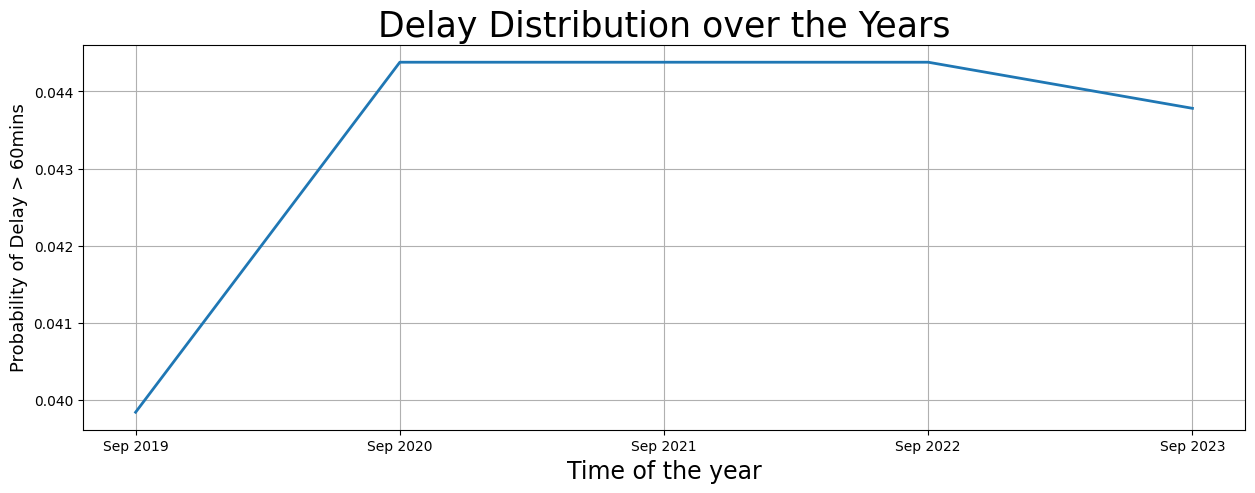

In [ ]:
delay_distribution = (
    transport_df
    .assign(flight_day = transport_df['YEAR'], is_delayed = transport_df['DEP_DELAY'] >= 60)
    .groupby('flight_day')
    .is_delayed.mean()
    .rolling(7, min_periods=1, center=True)
    .mean()
)

plt.figure(figsize=(15,5))
plt.plot(delay_distribution, linewidth=2)
period_starts = np.arange(2019,2024,1)
period_names = ['Sep 2019', 'Sep 2020', 'Sep 2021', 'Sep 2022', 'Sep 2023']
plt.xticks(period_starts, labels=period_names)
plt.grid()
plt.title('Delay Distribution over the Years', fontsize=25)
plt.xlabel('Time of the year', fontsize=17)
plt.ylabel('Probability of Delay > 60mins', fontsize=13)
plt.show()

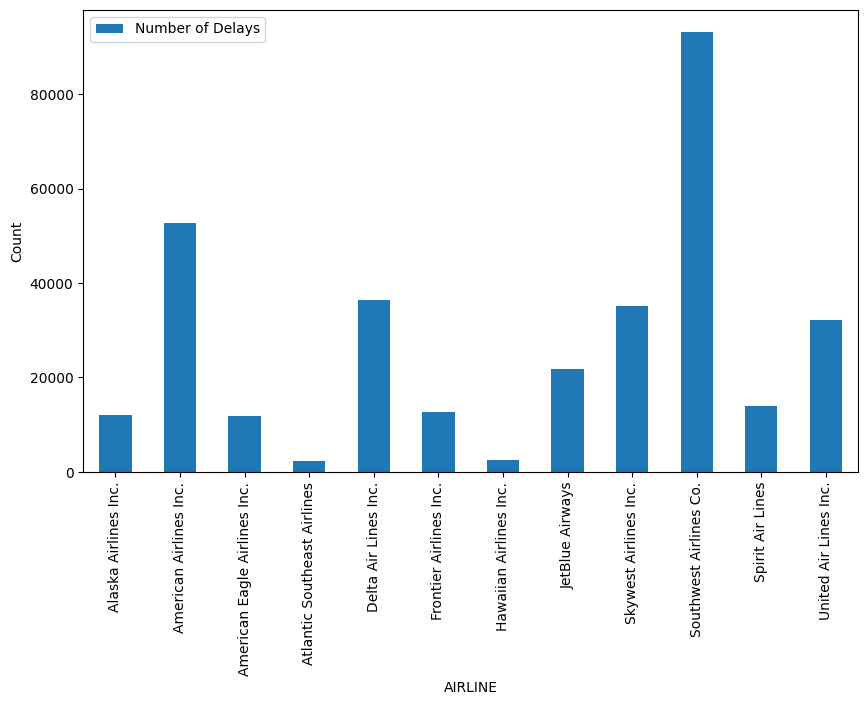

In [ ]:
data_select = transport_df.loc[:, ['AIRLINE', 'DEP_DEL15']].groupby('AIRLINE').sum()
ax = data_select.plot(kind='bar', figsize=(10,6))
ax.legend(['Number of Delays'])
plt.ylabel('Count')
plt.show()

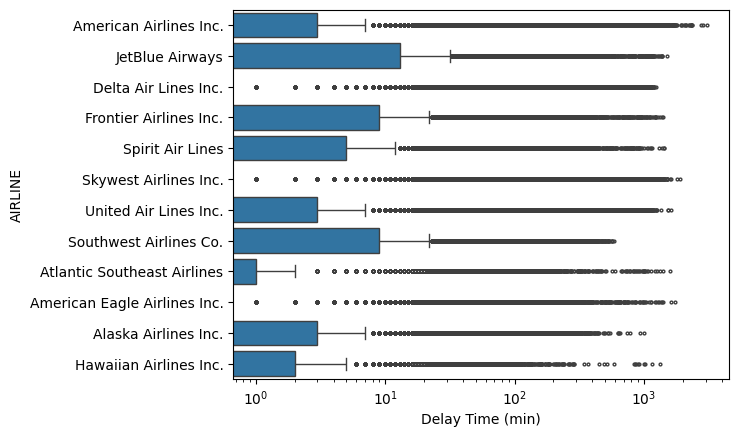

In [ ]:
# TODO:  add ARR_DELAY from the new dataset
# airline_deparr_plot = transport_df.loc[:, ['AIRLINE', 'DEP_DELAY']].groupby('AIRLINE').mean()
# airline_deparr_plot.plot.barh(figsize=(12,8), stacked=False)
# plt.show()

a = transport_df.loc[:, ['DEP_DELAY_NEW','AIRLINE']]
ax = sns.boxplot(y='AIRLINE', x='DEP_DELAY_NEW', data=a, linewidth=1, fliersize=2)
ax.set(xscale="log", xlabel='Delay Time (min)') #will ignore the negative value (no delays)
plt.show()

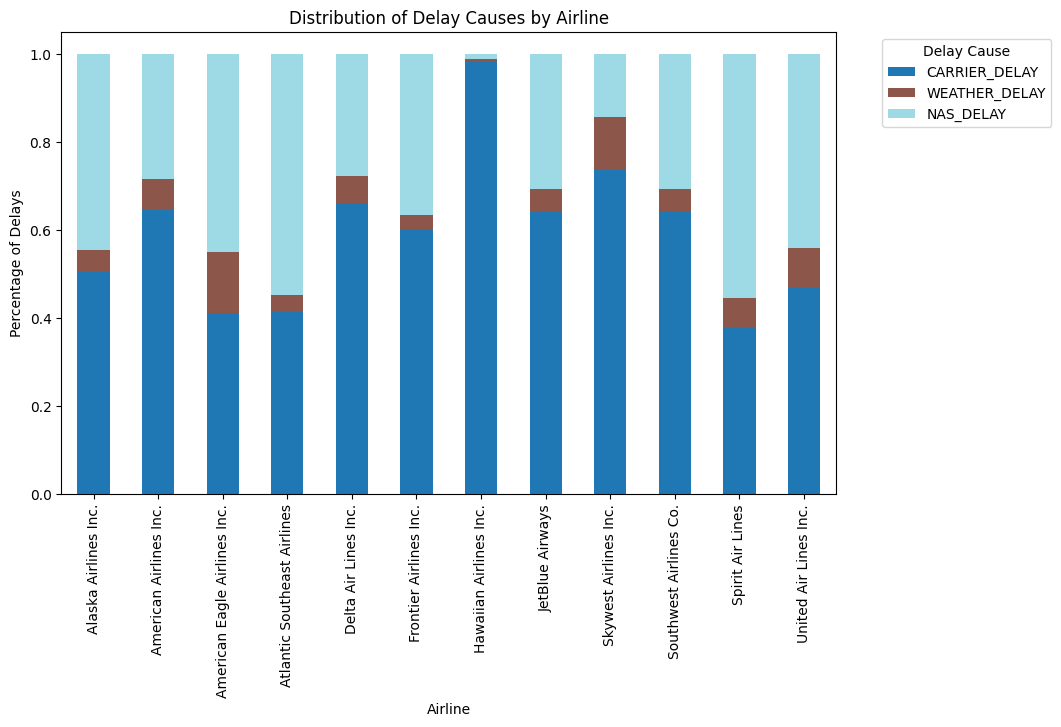

In [ ]:
# Aggregate delay causes
delay_causes = transport_df.groupby('AIRLINE')[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY']].sum()

# Normalize delay values for stacking
delay_causes_norm = delay_causes.div(delay_causes.sum(axis=1), axis=0)

# Create stacked bar chart
delay_causes_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xlabel("Airline")
plt.ylabel("Percentage of Delays")
plt.title("Distribution of Delay Causes by Airline")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1))
plt.show()

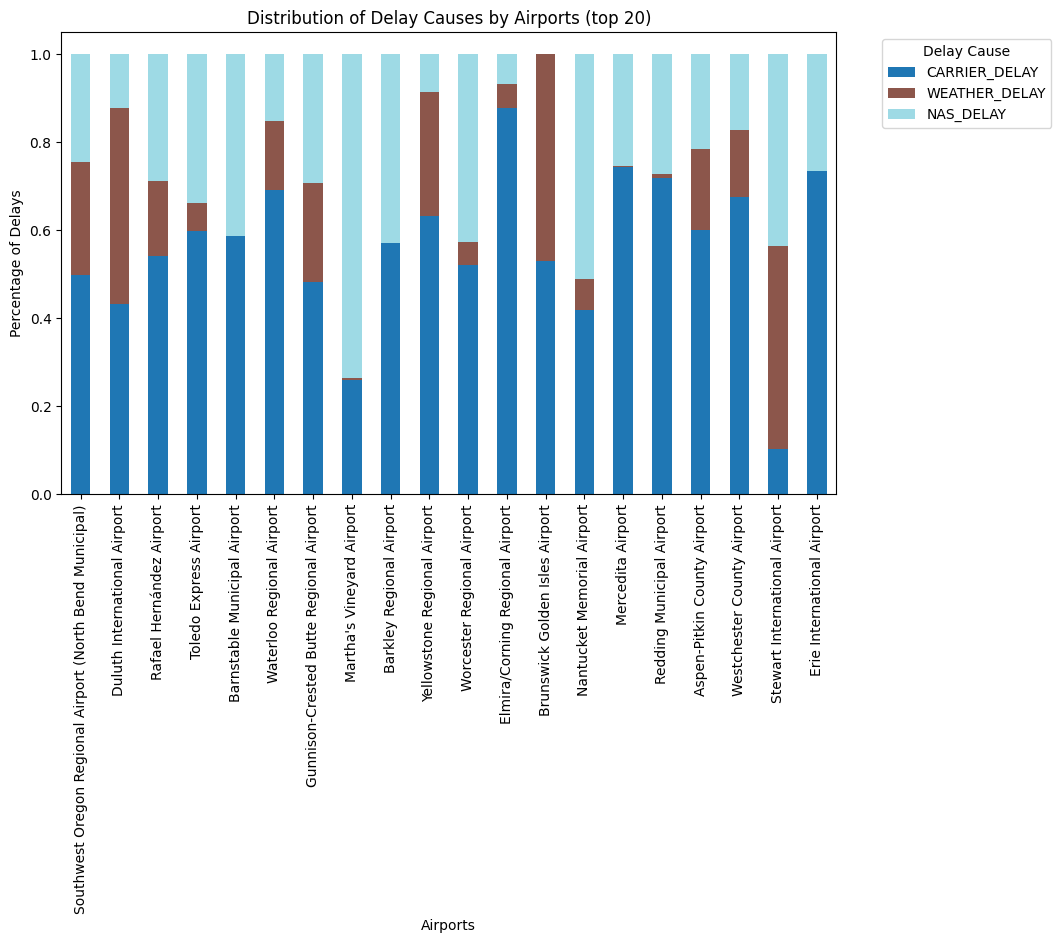

In [ ]:
delay_causes = transport_df.groupby('AIRPORT')[['DEP_DELAY_NEW','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY']].mean()
delay_causes = delay_causes.sort_values(by='DEP_DELAY_NEW', ascending=False)[:20]
delay_causes = delay_causes[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY']]
delay_causes_norm = delay_causes.div(delay_causes.sum(axis=1), axis=0)

delay_causes_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xlabel("Airports")
plt.ylabel("Percentage of Delays")
plt.title("Distribution of Delay Causes by Airports (top 20)")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
map_ = folium.Map(location=[37.0902, -95.7129],tiles="OpenStreetMap", zoom_start = 4, min_zoom=3)
df = transport_df[['LATITUDE', 'LONGITUDE', 'DEP_DELAY_NEW']]
df = df[df['DEP_DELAY_NEW'] >= 15]
df.dropna(inplace=True)
data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map_)
map_title = "Heatmap showing region-wise delay"
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
map_.get_root().html.add_child(folium.Element(title_html))
map_.save('map-with-title.html')
map_

In [ ]:
scatter = transport_df[['LATITUDE', 'LONGITUDE', 'AIRPORT','DEP_DELAY_NEW']]
scatter.dropna(inplace=True)
# scatter = scatter[scatter['DEP_DELAY_NEW'] >= 15]
scatter = scatter.groupby(['LATITUDE', 'LONGITUDE','AIRPORT'], as_index=False).DEP_DELAY_NEW.mean()

fig = px.scatter_mapbox(scatter, lat="LATITUDE", lon="LONGITUDE", hover_data=["AIRPORT", 'DEP_DELAY_NEW'], color="DEP_DELAY_NEW",
            zoom=3, height=500, title='Scatter plot showing average delay times at different airports')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

<ipython-input-127-82df33b744ed>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
d_types = transport_df[['LATITUDE', 'LONGITUDE', 'AIRPORT','DEP_DELAY_NEW','CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY',
                        # 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
                        ]]
d_types.dropna(inplace=True)
# scatter = scatter[scatter['DEP_DELAY_NEW'] >= 15]
d_types = d_types.groupby(['LATITUDE', 'LONGITUDE','AIRPORT'], as_index=False).mean()

main_delays = d_types.set_index(['LATITUDE', 'LONGITUDE', 'AIRPORT','DEP_DELAY_NEW']).idxmax(axis=1).reset_index()
main_delays = main_delays.rename(columns={0:'MAIN_DELAY_REASON'})

fig = px.scatter_mapbox(main_delays, lat="LATITUDE", lon="LONGITUDE", hover_data=["AIRPORT", 'MAIN_DELAY_REASON'], color='MAIN_DELAY_REASON',
            zoom=3, height=400, title='Scatter plot showing main delay cause at different airports')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

<ipython-input-129-b43a7cc6773e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go

transport_df_2023 = transport_df[transport_df['YEAR'] == 2023]

od = transport_df_2023.groupby(['ORIGIN', 'DEST'], as_index=False)['DEP_DELAY_NEW'].mean()
od = od.sort_values('DEP_DELAY_NEW', ascending=False)[:50]
od = od.reset_index()

fig = go.Figure()

for i in range(len(od)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lat = [airports[airports['ORIGIN'] == od['ORIGIN'][i]]['LATITUDE'].item(), airports[airports['ORIGIN'] == od['DEST'][i]]['LATITUDE'].item()],
            lon = [airports[airports['ORIGIN'] == od['ORIGIN'][i]]['LONGITUDE'].item(), airports[airports['ORIGIN'] == od['DEST'][i]]['LONGITUDE'].item()],
            mode = 'lines',
            line = dict(width = 2,color = 'red'),
            opacity = float(od['DEP_DELAY_NEW'][i]) / float(od['DEP_DELAY_NEW'].max()),
            hoverinfo='text',
            text = f"{airports[airports['ORIGIN'] == od['ORIGIN'][i]]['AIRPORT'].item()}   to   {airports[airports['ORIGIN'] == od['DEST'][i]]['AIRPORT'].item()}",
            textposition='top center',
        ))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airports[airports['ORIGIN'].isin(od['ORIGIN'])]['LONGITUDE'],
    lat = airports[airports['ORIGIN'].isin(od['ORIGIN'])]['LATITUDE'],
    hoverinfo = 'text',
    hovertext = airports[airports['ORIGIN'].isin(od['ORIGIN'])]['AIRPORT'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airports[airports['ORIGIN'].isin(od['DEST'])]['LONGITUDE'],
    lat = airports[airports['ORIGIN'].isin(od['DEST'])]['LATITUDE'],
    hoverinfo = "text",
    hovertext = airports[airports['ORIGIN'].isin(od['DEST'])]['AIRPORT'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(0, 0, 255)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

fig.update_layout(
    title_text = '2023 Top 50 delayed flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        visible=False, resolution=50, scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    showland=True,landcolor="rgb(210, 217, 217)"
    ),
)

fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})

fig.show()

Visualizations for Transport data combined with BirdStrike Data

In [33]:
combined_df = pd.read_csv("/content/drive/MyDrive/SD/combined_all_SD.csv")
combined_df["DAMAGE_LEVEL"].replace("0","N", inplace=True)

<ipython-input-33-50525918a1c2>:1: DtypeWarning:

Columns (60,134) have mixed types. Specify dtype option on import or set low_memory=False.



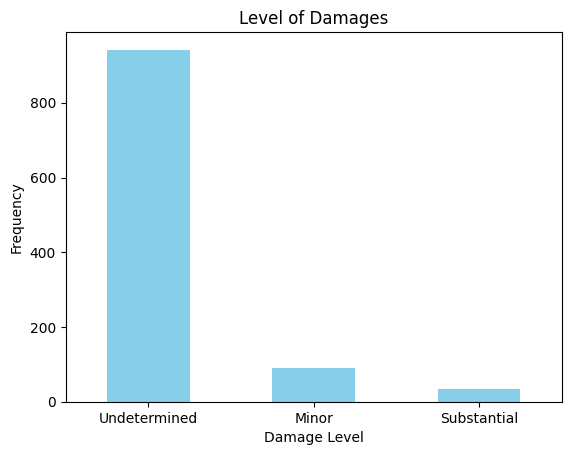

In [34]:
import matplotlib.pyplot as plt
new_values = {"N":"None","M?":"Undetermined","M":"Minor","S":"Substantial"}
damage_counts = combined_df["DAMAGE_LEVEL"].replace(new_values)
damage_counts = damage_counts[damage_counts!="None"]
value_counts = damage_counts.value_counts()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Level of Damages')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

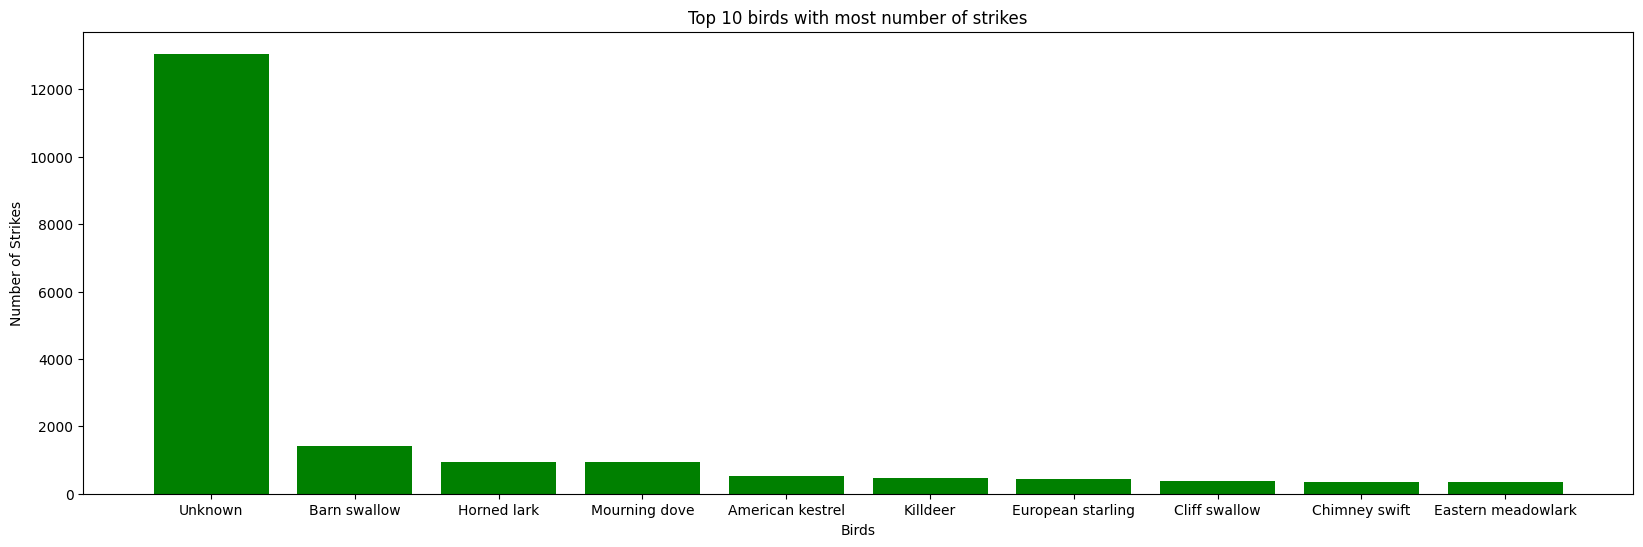

In [35]:
new_df = combined_df['SPECIES'].apply(lambda x: 'Unknown' if x.startswith('Unknown') else x)
top_species = new_df.value_counts().nlargest(10)

figure(figsize=(20, 6))
plt.bar(list(top_species.keys()), top_species.values, color='green')
plt.title('Top 10 birds with most number of strikes')
plt.xlabel('Birds')
plt.ylabel('Number of Strikes')
plt.show()

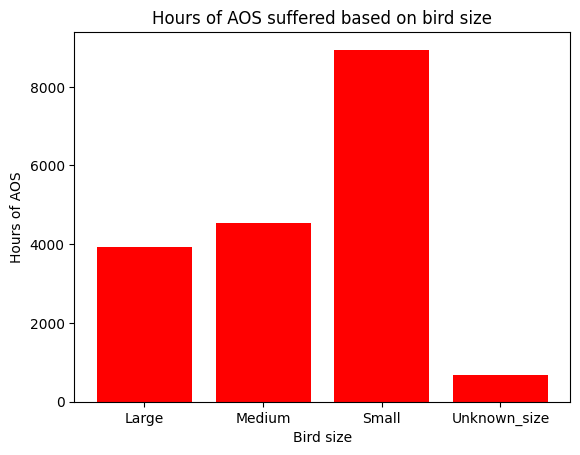

In [36]:
grouped_data = dict(combined_df.groupby('SIZE')['AOS'].sum())
grouped_data["Unknown_size"] = grouped_data.pop("0", None)

plt.bar(list(grouped_data.keys()), list(grouped_data.values()), color='red')
plt.title('Hours of AOS suffered based on bird size')
plt.xlabel('Bird size')
plt.ylabel('Hours of AOS')
plt.show()

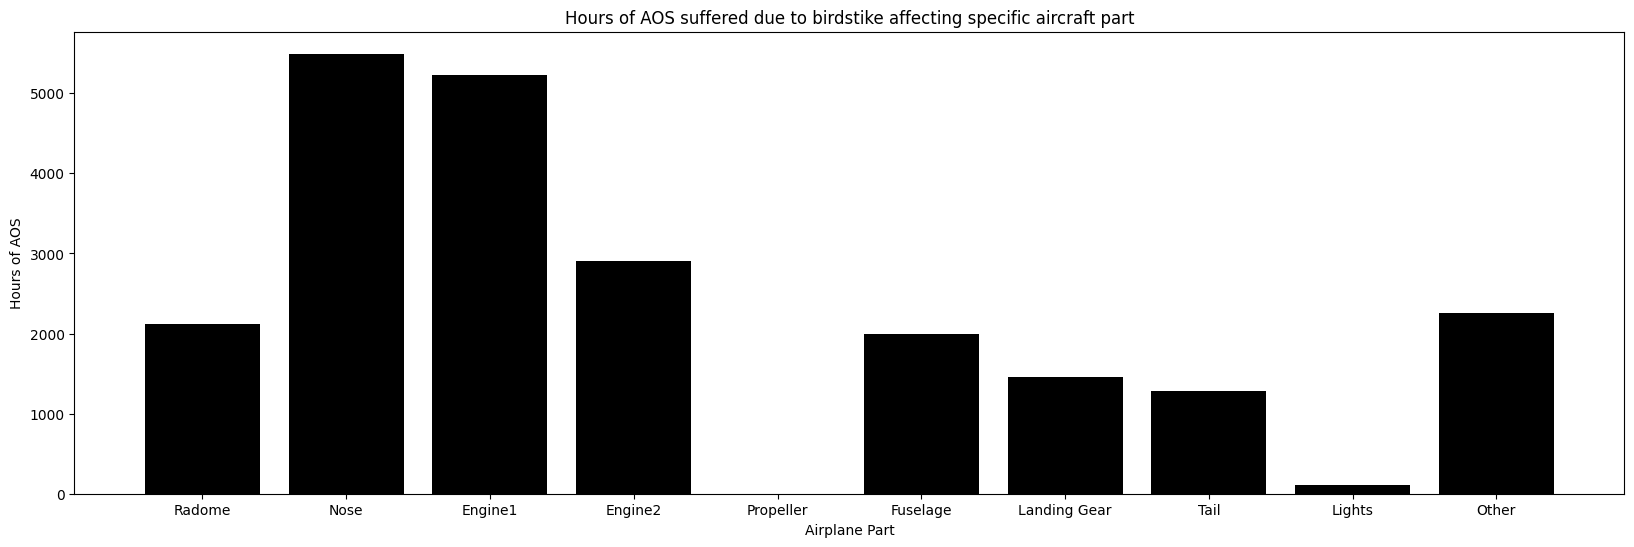

In [37]:
struck_columns = ["STR_RAD", "STR_NOSE","STR_ENG1","STR_ENG2", "STR_PROP","STR_FUSE","STR_LG","STR_TAIL","STR_LGHTS","STR_OTHER"]
parts = ["Radome","Nose", "Engine1", "Engine2", "Propeller", "Fuselage","Landing Gear","Tail","Lights", "Other"]
dicti = {}
for i in range(len(struck_columns)):
  col = struck_columns[i]
  current_part = combined_df[combined_df[col]==1]
  part = parts[i]
  dicti[part] = current_part["AOS"].sum()

figure(figsize=(20, 6))
plt.bar(list(dicti.keys()), list(dicti.values()), color='black')
plt.title('Hours of AOS suffered due to birdstike affecting specific aircraft part')
plt.xlabel('Airplane Part')
plt.ylabel('Hours of AOS')
plt.show()

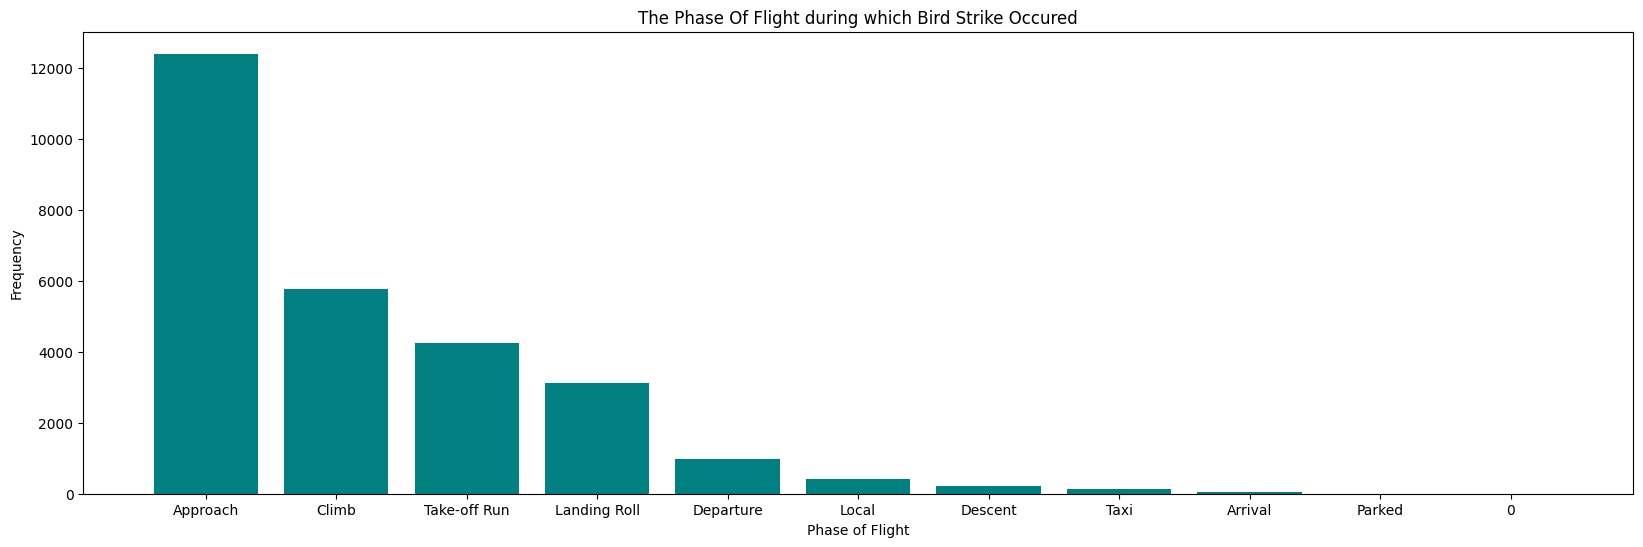

In [38]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6))
phase = combined_df["PHASE_OF_FLIGHT"]
plt.bar(phase.unique(),phase.value_counts(), color='teal')
plt.title('The Phase Of Flight during which Bird Strike Occured')
plt.xlabel('Phase of Flight')
plt.ylabel('Frequency')
plt.show()